In [46]:
import pandas as pd 
df=pd.read_csv("labeled_data.csv")
df.head(3)

,Unnamed: 0,count,hate_speech,offensive_language,neither,class,tweet
0,0,3,0,0,3,2,!!! RT @mayasolovely: As a woman you shouldn't...
1,1,3,0,3,0,1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...
2,2,3,0,3,0,1,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24783 entries, 0 to 24782
Data columns (total 7 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          24783 non-null  int64 
 1   count               24783 non-null  int64 
 2   hate_speech         24783 non-null  int64 
 3   offensive_language  24783 non-null  int64 
 4   neither             24783 non-null  int64 
 5   class               24783 non-null  int64 
 6   tweet               24783 non-null  object
dtypes: int64(6), object(1)
memory usage: 1.3+ MB


In [48]:
df.columns

Index(['Unnamed: 0', 'count', 'hate_speech', 'offensive_language', 'neither',
       'class', 'tweet'],
      dtype='object')

In [49]:
df.isnull().sum() #checking the number of missing values in each column

Unnamed: 0            0
count                 0
hate_speech           0
offensive_language    0
neither               0
class                 0
tweet                 0
dtype: int64

In [50]:
tweets=df.tweet #storing the tweet column of dataset into variable named tweets

In [51]:
df['class'].unique()

array([2, 1, 0], dtype=int64)

In [52]:
#DATA PREPROCESSING
#It aims to ensure that the data is clean, consistent, and suitable for training a machine learning model.

#1. Text Cleaning(removing punctuation,special charactersetc.)
#2. Tokenization (Breaking the text into individual words or tokens)
#3. Convert all text to lowercase
#4. Removing Stopwords(words that do not carry much meaning, such as "and," "the," "is," etc.)
#5. Stemming (Reduceing words to their base or root form)
# Handling Missing Data 

In [53]:
import re
import nltk 
stemmer=nltk.SnowballStemmer("english")
from nltk.corpus import stopwords


In [54]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\nupur\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [55]:
import string  
stopword=set(stopwords.words("english"))

In [56]:
# df['labels']= df['class'].map({0:"Hate Speech Detected",1:"Offevsive language Detected",2:"none"})
# df.head(3)

In [58]:
df1=df[['tweet','class']]
df1.head(3)

,tweet,class
0,!!! RT @mayasolovely: As a woman you shouldn't...,2
1,!!!!! RT @mleew17: boy dats cold...tyga dwn ba...,1
2,!!!!!!! RT @UrKindOfBrand Dawg!!!! RT @80sbaby...,1


In [59]:
#The clean function here is designed to clean and transform a given text
def clean(twt):
    twt=str(twt).lower()
    twt=re.sub(r'\[.*?\]','',twt) # match the shortest sequence of characters between square brackets in a given text.
    twt = re.sub(r"https?://[^\s]+\.[^\s]+", "", twt)  # Removes any URL
    twt=re.sub(r'[^\w\s]','',twt) #to delete punctuations
    twt=re.sub(r'\n','',twt) #removes newline
    twt=re.sub(r'\w*\d\w*','',twt) #removes words with digits
    twt=[word for word in twt.split(' ')if word not in stopword] #removes stopwords
    twt=" ".join(twt) #join cleaned words back to string
    twt=[stemmer.stem(word) for word in twt.split(' ') ]#apply stemming to each word
    twt=" ".join(twt) #join stemmed words back to string
    return twt




In [60]:
df1["tweet"]=df1["tweet"].apply(clean) #apply clean function to tweet column 


C:\Users\nupur\AppData\Local\Temp\ipykernel_61112\2418884873.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1["tweet"]=df1["tweet"].apply(clean) #apply clean function to tweet column


In [61]:
import numpy as np #for numerical operations
from sklearn.feature_extraction.text import CountVectorizer  #for text feature extraction  will be used to convert the text data into a matrix of token counts.
from sklearn.model_selection import train_test_split  #for splitting data sets
from sklearn.tree import DecisionTreeClassifier  # for implementing decision tree-based classification


In [63]:
x=np.array(df1["tweet"])
y=np.array(df1["class"])

cv = CountVectorizer()  # creates an instance of the CountVectorizer class 
x= cv.fit_transform(x)  #converts the text data into a sparse matrix of token counts
X_train, X_test, y_train, y_test = train_test_split(x,y,test_size = 0.33,random_state=42)



In [64]:
model=DecisionTreeClassifier()
model.fit(X_train, y_train) #to train the decision tree classifier
y_predict=model.predict(X_test)



In [65]:
import pickle
with open("model.pkl", "wb") as f:
    pickle.dump(model, f)  #save the trained model to a file named "model.pkl"

with open("vectorizer.pkl", "wb") as f:
    pickle.dump(cv, f)  #save the CountVectorizer to a file named "vectorizer.pkl"

In [66]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test,y_predict))

0.8678322533317031


In [ ]:
data="lets kill jews and kill them for fun "
data=cv.transform([data]).toarray() #converts the sparse matrix representation of the transformed data into a dense NumPy array.( represents the token counts of the words in the input text, using the same vocabulary learned during training.)
print(model.predict((data))) #m ake predictions on the transformed data using the trained decision tree classifier

[0]


In [68]:

data="this bitch is getting on my nerves"
data=cv.transform([data]).toarray() 
print(model.predict((data))) 

[1]


In [69]:
data="this b*tch is getting on my nerves"
data=cv.transform([data]).toarray()
print(model.predict((data)))

[2]


In [73]:
from sklearn.metrics import precision_score, classification_report

# Ensure y_test and y_predict contain label strings (not integers)
# If not, map them as needed using your label mapping dictionary
label_mapping = {0: "Hate Speech Detected", 1: "Offensive Language Detected", 2: "None"}

# Compute precision
precision = precision_score(y_test, y_predict, average=None)

# Print precision per class
for i, label in enumerate(label_mapping.values()):
    print(f'Precision for class "{label}": {precision[i]}')

# Print classification report with string target names
print('\nClassification Report:\n', classification_report(
    y_test, y_predict, target_names=list(label_mapping.values())
))


Precision for class "Hate Speech Detected": 0.34841628959276016
Precision for class "Offensive Language Detected": 0.9143435601931164
Precision for class "None": 0.8153495440729484

Classification Report:
                              precision    recall  f1-score   support

       Hate Speech Detected       0.35      0.33      0.34       465
Offensive Language Detected       0.91      0.93      0.92      6335
                       None       0.82      0.78      0.80      1379

                   accuracy                           0.87      8179
                  macro avg       0.69      0.68      0.69      8179
               weighted avg       0.87      0.87      0.87      8179



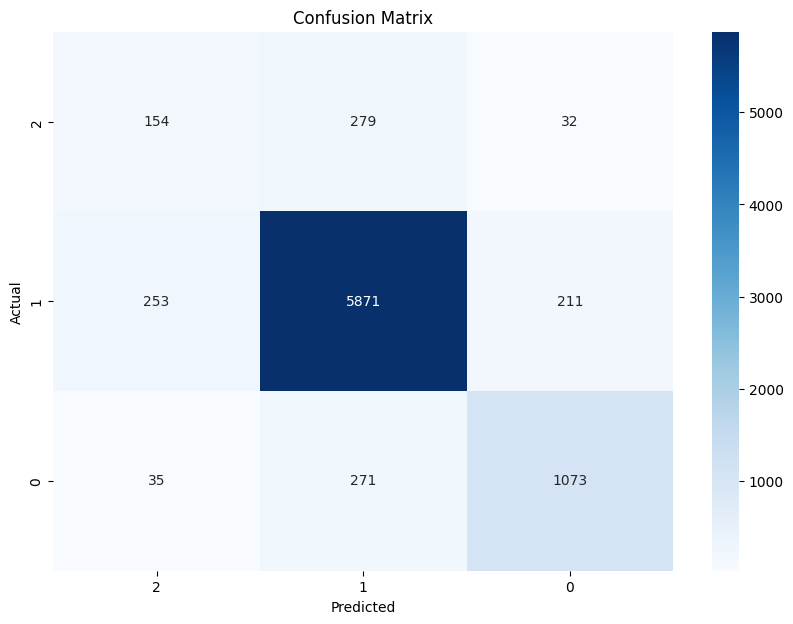

In [75]:
import matplotlib.pyplot as plt
import seaborn as sns
conf_matrix = confusion_matrix(y_test, y_predict)
plt.figure(figsize=(10,7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()